# Preprocesamiento para Machine Learning

In [ ]:
import pandas as pd
import numpy as np

from plotnine import ggplot, aes, geom_histogram, facet_grid, facet_wrap, geom_bar, geom_point
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

## Introducción al conjunto de datos y a la pregunta de investigación

Consideramos un conjunto de datos de dominio público alojado en la [página de Luís Torgo de la Universidad de Oporto]("https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html"), quien, a su vez, lo obtuvo del repositorio StatLib, que ahora está cerrado. 

Este conjunto de datos contiene aproximadamente 21,000 observaciones extraídas de la base de datos del censo poblacional de California, Estado Unidos de 1990. Cada observación corresponde a un grupo de bloque, la unidad geográfica catalogada como mínima en Estados Unidos y está compuesta de 600 a 3,000 personas. 

El conjunto de datos es casi idéntico al original, con dos diferencias:
* Se eliminaron aleatoriamente 207 valores de la columna total_bedrooms.
* Se agregó un atributo categórico adicional llamado ocean_proximity, que indica la cercanía al océano.

La pregunta de investigación que buscaremos resolver es la siguiente: **¿Qué tan viable es la predicción de los precios de las vivienda en California, Estados Unidos utilizando datos censales?**

## Carga de conjunto de datos original y vista rápida

In [ ]:
housing = pd.read_csv("https://raw.githubusercontent.com/sarahiaguilar/fundamentos-cdd/main/datos/housing.csv")

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
 housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Visualización de la distribuición de las variables continuas

Un histograma es una representación gráfica de una variable continua en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. Sirven para obtener un **panorama de la distribución** de la población, o de la muestra, **respecto a una variable, continua**. Así pues, es posible evidenciar **tendencias en el comportamiento** y observar el **grado de homogeneidad** entre los valores de todas las observaciones.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc05eb53f10>,
      dtype=object)

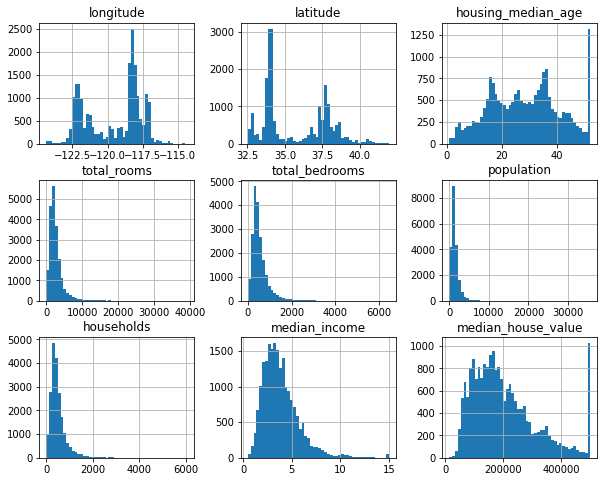

In [ ]:
# Grafica histograma para cada variable continua
housing.hist(bins=50, figsize=(10,8))

A partir del gráfico anterior, es posible observar que: 

* La variable `median_income` no parece estar expresada en dólares estadounidenses (USD). Pareciera que los datos se **escalaron** a decenas de miles de dólares (por ejemplo, 3 en realidad significa alrededor de $30,000, y se **limitaron** a 15 (en realidad, 15,000) para ingresos medios más altos, y a 0.5 (en realidad, 0.499) para ingresos medios más bajos. Los números representan aproximadamente.

* Las variables `housing_median_age` y `median_house_value` también parecen estar **limitadas**. La limitación de esta última variable puede ser un problema grave dado que se trata de la variable objetivo y **nuestro modelo de Machine Learning pueden aprender que los precios nunca superan ese límite**. Entre otras, dos posibles soluciones son las siguientes: 
  * **Recopilar** las etiquetas adecuadas para las observaciones cuyas etiquetas fueron limitadas.
  * **Eliminar** las observaciones cuyas etiquetas fueron limitadas.

* Las variables tienen **escalas muy diferentes**. 

* En la mayoría de las variables, la **distribución no es simétrica** y se extienden mucho más a la derecha de la media que a la izquierda. Esto puede **complicar la detección de patrones** por nuestro modelo de Machine Learning. 

## Creación del conjunto de datos de entrenamiento

Supongamos que nos gustaría **estimar el error de prueba asociado con el ajuste de un modelo de aprendizaje automático** particular en un conjunto de observaciones. El enfoque del conjunto de entrenamiento es una estrategia simple que implica **dividir aleatoriamente el conjunto de datos disponible en dos partes: un conjunto de entrenamiento (normalmente el 20% del conjunto de datos disponible) y un conjunto de prueba. El modelo se ajusta al conjunto de entrenamiento y el modelo ajustado se usa para predecir las respuestas de las observaciones en el conjunto de de prueba.** La tasa de error del conjunto de prueba resultante proporciona una estimación de la tasa de error de la prueba.

In [ ]:
# Función que divide aleatoriamente un conjunto de datos 
# en un conjunto de datos de entrenamiento y un conjunto de datos de prueba
# dado el porcentaje de observaciones que se volveran el conjunto de datos de prueba 
def my_train_test_split(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  return

In [ ]:
# Divide conjunto de datos con my_train_test_split
train_set, test_set = 

Scikit-Learn proporciona algunas funciones para dividir conjuntos de datos en múltiples subconjuntos de varias maneras. La función más simple es `train_test_split`, cuyo parámetro `random_state` resulta muy últil pues permite establecer la semilla del generador aleatorio. 

In [ ]:
# Divide conjunto de datos con train_test_split
train_set, test_set = 

El muestreo aleatoriogeneralmente está bien si nuestro conjunto de datos es lo suficientemente grande (especialmente en relación con la cantidad de variables, pero si no lo es, se corre el riesgo de introducir un sesgo de muestreo. **Siempre se busca que las muestras sean representativas de toda la población.**

Por ejemplo, la población de México está compuesta por un 51.8% de mujeres y un 48.2% de hombres, por lo que una encuesta levantada a 1,000 mexicanos intentaría mantener esta proporción en su muestra: 518 mujeres y 482 hombres. Esto se llama **muestreo estratificado: la población se divide en subgrupos homogéneos llamados estratos, y se muestrea el número correcto de instancias de cada estrato para garantizar que el conjunto de prueba sea representativo de toda la población.** 

Supongamos que conversamos con expertos que comentaron que el ingreso medio es un atributo muy importante para predecir los precios medios de la vivienda. Por lo tanto, resulta importante asesgurarnos que los conjuntos de entrenamiento y de prueba sean representativos en los distintos niveles de ingresos en todo el conjunto de datos.


Dado que el ingreso medio es una variable continua, primero debemos crear una nueva variable que indique el nivel de ingresos. Y, para asesgurarnos de tener una cantidad suficiente de observaciones para cada nivel, de lo contrario, no deben ser demasiados niveles y cada uno debe ser lo suficientemente grande. 

In [ ]:
# Crear una variable de nivel de ingresos con 5 categorías (etiquetadas del 1 al 5):
# la categoría 1 va de 0.0 a 1.5 (es decir, menos de $15,000), la categoría 2 de 1.5 a 3.0, y así sucesivamente
housing["income_level"] =        (housing["median_income"],
                                 bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                 labels=[1, 2, 3, 4, 5])

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


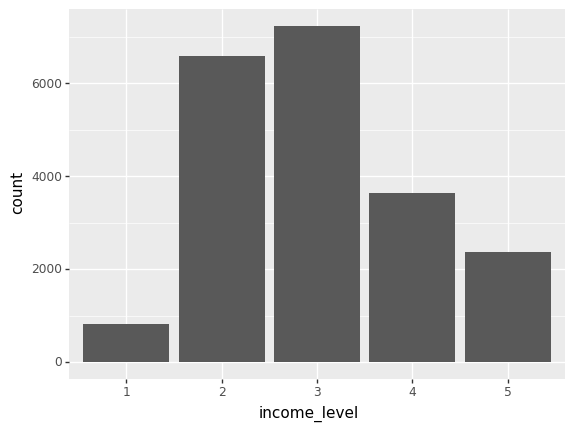

<ggplot: (8779011859541)>

In [ ]:
# Gráfico de barras que muestra los niveles de ingresos y la frecuencia de cada uno
ggplot(housing) + aes(x="income_level") 

Para hacer un muestreo estratificado, en este caso, basado en la categoría de ingresos, Scikit-Learn proporciona la clase `StratifiedShuffleSplit`.

In [ ]:
# Divide conjunto de datos con StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_level"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:
# Devuelve la distribución de nivel en todo el conjunto de datos
housing["income_level"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_level, dtype: float64

In [ ]:
# Devuelve la distribución de nivel en el conjunto de entrenamiento


3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_level, dtype: float64

In [ ]:
# Devuelve la distribución de nivel en el conjunto de prueba


3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_level, dtype: float64

## Búsqueda de correlaciones

El coeficiente de **correlación de Pearson o R de Pearson, es un medida de la correlación lineal entre dos conjuntos de datos**. Es el cociente entre la covarianza de dos variables y el producto de sus desviaciones estándar; por lo tanto, es esencialmente una medida normalizada de la covarianza, de modo que **el resultado siempre tiene un valor entre −1 y 1**. Al igual que con la propia covarianza, la medida **solo puede reflejar una correlación lineal de variables** e ignora muchos otros tipos de relaciones.

Dado que el conjunto de datos no es demasiado grande, podemos calcular fácilmente el coeficiente de correlación estándar (también llamado R de Pearson) entre cada par de atributos usando el método `corr()`.

La **matriz de correlación** de $n$ variables aleatorias continuas $X_1...X_n$ es una matriz $n*n$ cuya entrada $(i,j)$ es $corr(X_i,X_j)$. Así, las entradas diagonales son todas idénticas.

In [ ]:
# Calcula matriz de correlación


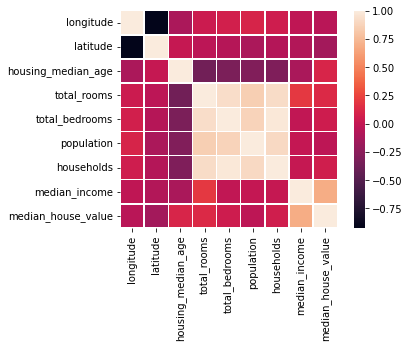

In [ ]:
# Grafica matriz de correlación en mapa de calor
sns.heatmap(corr_matrix, square=True, linewidths=0.5)

El coeficiente de correlación va de –1 a 1. Cuando está cerca de 1, significa que hay una fuerte correlación positiva; por ejemplo, el valor medio de la vivienda tiende a aumentar cuando aumenta el ingreso medio. Cuando el coeficiente es cercano a –1, significa que existe una fuerte correlación negativa; por ejemplo, se puede observar una pequeña correlación negativa entre la latitud y el valor medio de la vivienda (es decir, los precios tienen una ligera tendencia a bajar cuando va hacia el norte). Finalmente, los coeficientes cercanos a cero significan que no existe una correlación lineal.

In [ ]:
# Devuelve correlaciones con el median_house_value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Otra forma de visualizar la correlación entre las variables continuas es usar la función `scatter_matrix` de Pandas, que traza cada variable numérica con el resto de las variables numéricas. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc05a272e10>,
      dtype=object)

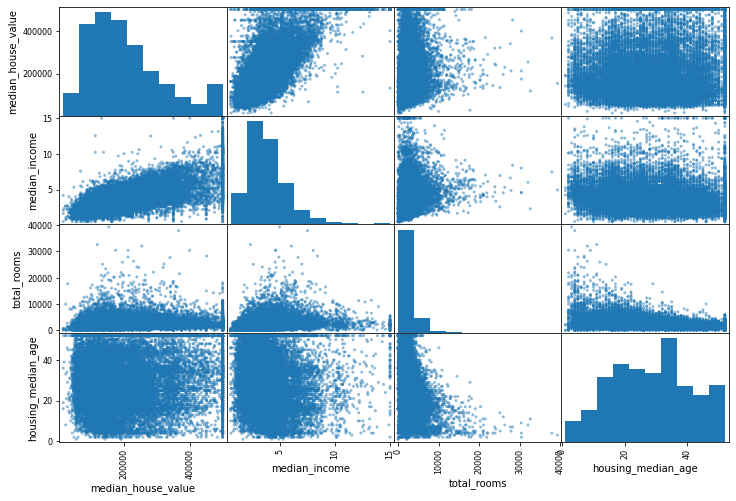

In [ ]:
# Grafica matriz de dispersión 
vars = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[vars], figsize=(12, 8))

La diagonal principal estaría llena de líneas rectas si Pandas trazara cada variable contra sí misma, lo que no sería muy útil. Entonces, en lugar de eso, Pandas muestra un histograma de cada atributo. 


En el gráfico anterior, se puede observar que la variable más prometedora para predecir el valor medio de la vivienda es el ingreso medio. 

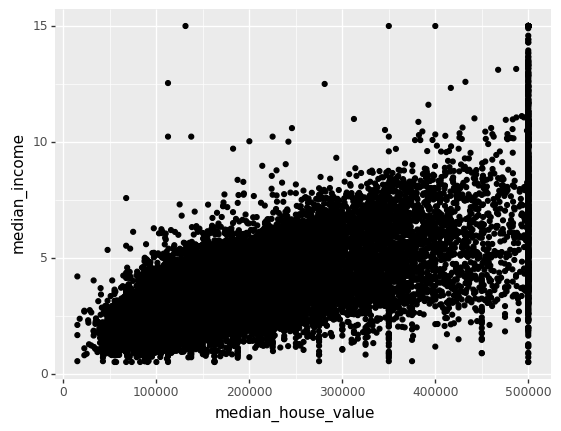

<ggplot: (8779005756205)>

In [ ]:
# Gráfico de barras que muestra el valor medio de la vivienda y el ingreso medio
ggplot(housing) + aes(x="median_house_value", y="median_income") 

El grafico anterior revela información relevante. Primero, la correlación entre el valor medio de la vivienda y el ingreso medio empíricamente fuerte. En segundo lugar, el límite de precio, que se había observado anteriormente, es claramente visible como una línea horizontal en \$500,000 en el valor medio de la vivienda. No obstante, este gráfico también revela otras líneas rectas menos obvias: una línea horizontal alrededor de \$450,000, otra alrededor de \$350,000, quizás una alrededor de \$280,000 y algunas más por debajo de esa. Con el objetivo de que el modelo de machine learning no aprenda a reproducir estas peculiaridades de los datos, sería necesario eliminar las observaciones correspondientes. 

## Feature engineering

Anteriormente, habíamos observado que, para algunas variables continuas, la distribución no es simétrica y se extienden mucho más a la derecha de la media que a la izquierda, por lo que sería necesario transformarlos; por ejemplo, calculando su logaritmo. 

En el mundo real, **no existe un "formato correcto o ideal" para la variables independiente**. Con esto en mente, uno de los pasos más importantes en la implementación de modelos de Machine Learning es el **feature engineering**, es decir, **tomar cualquier información que tenga sobre su problema y convertirla en números que pueda usar para construir la matriz de características** (matriz de datos de las variables independientes).

Por otro lado, el número total de habitaciones en un distrito no es muy útil si no sabe cuántos hogares hay. El dato que nos podría interesar es el número de habitaciones por hogar. Del mismo modo, el número total de dormitorios por sí solo no es muy útil, por lo que también nos podría interesar es compararlo con el número de habitaciones. Finalmente, la población por hogar y el total de habitaciones también parece una combinación de variables interesante para estudiar. 

In [ ]:
# Crea tres nuevas variables
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
# Calcula matriz de correlación


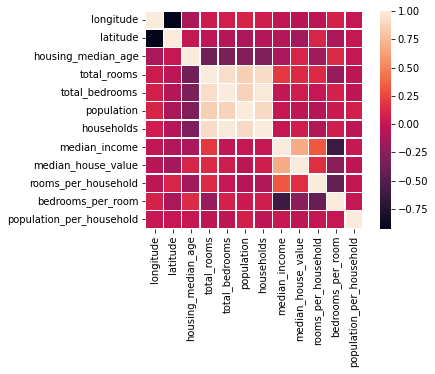

In [ ]:
# Grafica matriz de correlación en mapa de calor


In [ ]:
# Devuelve correlaciones con el median_house_value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

La nueva variable `rooms_per_household` está mucho más correlacionado con el valor medio de la vivienda que con el número total de habitaciones o dormitorios. Aparentemente, las casas con una relación dormitorio/habitación más baja tienden a ser más caras. El número de habitaciones por hogar también es más informativo que el número total de habitaciones en un distrito; obviamente, cuanto más grandes son las casas, más caras son.

El feature engineering no tiene que ser absolutamente minuciosa en esta etapa; el objetivo inicial es obtener rápidamente conocimientos que ayudaran a obtener mayor información en la relación de las variables independientes con la variable dependiente. Más bien, el feature engineering es un proceso iterativo, incluso después de la construcción de la primera versión del modelo. 

Y recuerden... **IT'S NOT A SMOOTHIE!**

<image src="https://pickyeaterblog.com/wp-content/uploads/2014/09/IMG_20140816_125232-MOTION.gif">